In [37]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import json

## Quick Test

[[ 1.255528 -0.076749 -0.178779]
 [-0.078411  0.930809  0.147602]
 [ 0.004733  0.691367  0.3039  ]]


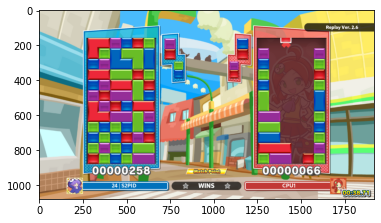

In [34]:
# Max tritanopia
trit10 = [
    1.255528, -0.076749, -0.178779,
    -0.078411, 0.930809, 0.147602,
    0.004733, 0.691367, 0.303900
]
trit10 = np.array(trit10).reshape(3, 3)
print(trit10)

img = cv2.imread('./images/regions/blocks.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [35]:
print('PNG has dimensions:', img.shape)
img_1d = img.transpose((2, 0, 1))
img_1d = img_1d.reshape(3, -1)
print('Flattened image dimensions:', img_1d.shape)

PNG has dimensions: (1080, 1920, 3)
Flattened image dimensions: (3, 2073600)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


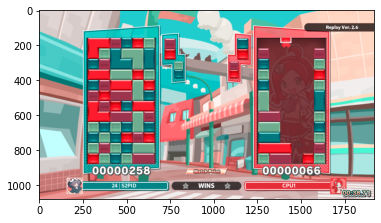

In [36]:
# Change uint 0-255 image to float 0.0-1.0
img_1df = img_1d / 255
img_1df = (trit10 @ img_1df).reshape(3, 1080, 1920)
img_1df = (img_1df.transpose((1, 2, 0)))
plt.imshow(img_1df)

## Puyo Skin Tests

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
(1024, 2048, 4)
-0.1543471482108404


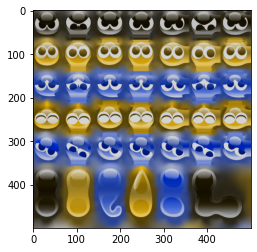

In [71]:
cvd_data = json.load(open("cvd.json"))
prot10 = np.array(cvd_data["protanomaly"][9])

gummy_prot = cv2.imread('./images/puyo/puyo_gummy_cvd1.png', cv2.IMREAD_UNCHANGED)
print(gummy_prot.shape)
gummy_prot = cv2.cvtColor(gummy_prot, cv2.COLOR_BGRA2RGB)
gummy_prot = gummy_prot / 255
gummy_prot_1d = gummy_prot.transpose((2, 0, 1)).reshape(3, -1)
gummy_prot_1d = (prot10 @ gummy_prot_1d).reshape(3, 1024, 2048)
gummy_prot = gummy_prot_1d.transpose((1, 2, 0))
gummy_prot = gummy_prot / np.amax(gummy_prot)
print(np.amin(gummy_prot))
plt.imshow(gummy_prot[0:500, 0:500])